In [112]:
import polars as pl
import polars.selectors as cs
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
import numpy as np
from great_tables import style, loc

In [113]:
df = pl.read_csv('Salary_Data.csv')

In [114]:
df

YearsExperience,Salary
f64,f64
1.1,39343.0
1.3,46205.0
1.5,37731.0
2.0,43525.0
2.2,39891.0
…,…
9.0,105582.0
9.5,116969.0
9.6,112635.0


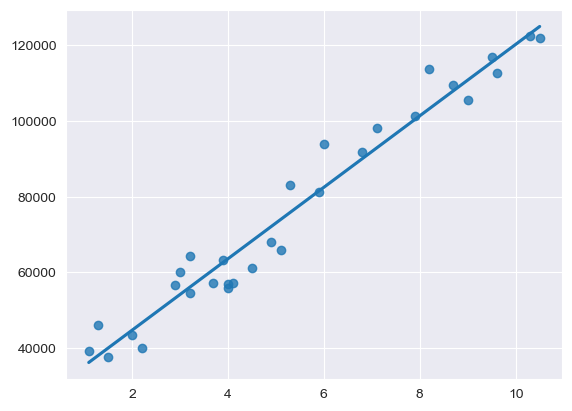

In [134]:
sns.regplot(data=df, x='YearsExperience', y='Salary', ci=None)  #
plt.show()

In [116]:
fig = px.scatter(df, x='YearsExperience', y='Salary', trendline='ols')
fig.show()

In [117]:
X = df.with_columns(cs.exclude(['Salary']))

In [118]:
y = df.select('Salary')

In [119]:
from sklearn.model_selection import train_test_split

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [121]:
from sklearn.preprocessing import StandardScaler

In [122]:
scaler = StandardScaler()

In [123]:
scaled_X_train = scaler.fit_transform(X_train)

In [124]:
scaler_X_test = scaler.transform(X_test)

In [125]:
from sklearn.linear_model import LinearRegression

In [126]:
line_model = LinearRegression()

In [127]:
line_model.fit(scaled_X_train, y_train)

LinearRegression()

In [128]:
predictions = line_model.predict(scaler_X_test)

In [129]:
predictions = [p[0] for p in predictions]

In [131]:
y_test = pl.Series(y_test)
predictions = pl.Series(predictions)

In [132]:
pl.DataFrame({
    'Actual': y_test,
    'Predicted': predictions,
    'Error': y_test - predictions
})

Actual,Predicted,Error
f64,f64,f64
112635.0,112635.0,0.0
67938.0,67938.0,0.0
113812.0,113812.0,0.0
83088.0,83088.0,0.0
64445.0,64445.0,0.0
57189.0,57189.0,0.0
